# Tutorial for checking Moving Neighborhood

This file is meant to demonstrate the use of gstlearn for Moving Neighborhood search

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt
import random as rnd

Setting some global variables

In [3]:
# Set the Global Options
verbose = True
flagGraphic = True

# Define the Space Dimension
ndim = 2
gl.defineDefaultSpace(gl.ESpaceType.RN, ndim)

# Set the Seed for the Random Number generator
gl.law_set_random_seed(5584)
rnd.seed(13155)

In this paragraph, we generate a Poisson data set and check various neighborhoods around one specific node of a regular grid.

In [4]:
dxref = 0.1
grid = gl.DbGrid.create(nx=[10,10],dx=[dxref,dxref])
xlim = grid.getExtrema(0)
ylim = grid.getExtrema(1)

# Poisson Data Set

In [5]:
coormin = grid.getCoorMinimum()
coormax = grid.getCoorMaximum()
nech = 100
data = gl.Db.createFromBox(nech, coormin, coormax)

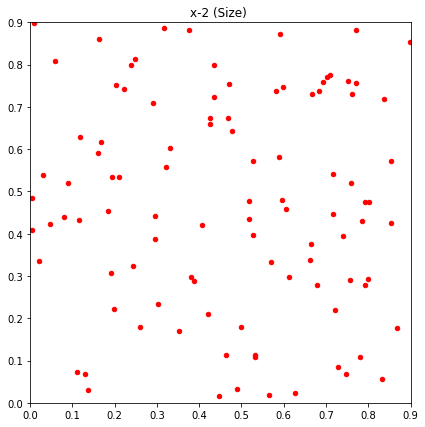

In [6]:
gp.setDefaultGeographic(xlim=xlim, ylim=ylim, dims=[7,7])
ax = data.plot()

## Checking standard neighborhood

Defining a standard Moving Neighborhood

In [7]:
nmini = 1
nmaxi = 15
radius = 0.3
nsect = 8
nsmax = 3
neigh = gl.NeighMoving.create(False, nmaxi, radius, nmini, nsect, nsmax)
neigh


Moving Neighborhood
Minimum number of samples           = 1
Maximum number of samples           = 15
Number of angular sectors           = 8
Maximum number of points per sector = 3
Maximum horizontal distance         = 0.3

Checking the neighborhood around a central grid node

In [8]:
node = 55
neigh.attach(data, grid)
ranks = neigh.select(node)

dataSel = data.clone()
dum = dataSel.addSelectionByRanks(ranks)

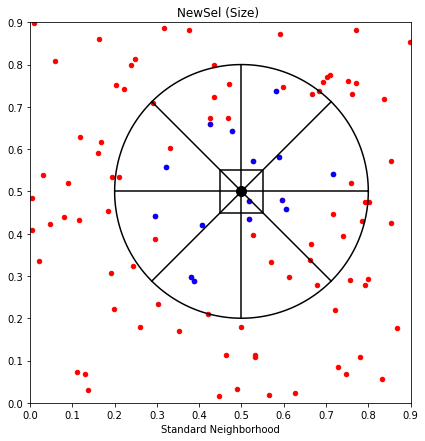

In [9]:
ax = data.plot()
ax = dataSel.plot(color='blue')
ax.neigh(neigh, grid, node, flagCell=True)
ax.decoration("Standard Neighborhood")

## Defining variable block extensions

In this section, we will generate variables in the Grid which contain the cell extension: this cell extension replaces the constant value of the mesh.

In [10]:
nech = grid.getSampleNumber()
mini = 0.5
maxi = 2.5
blx = []
bly = []
for i in range(nech):
    blx.append(dxref * rnd.uniform(mini, maxi))
    bly.append(dxref * rnd.uniform(mini, maxi))

dum = grid.addColumns(blx, "X-ext", gl.ELoc.BLEX, 0)
dum = grid.addColumns(bly, "Y-ext", gl.ELoc.BLEX, 1)

The following display shows each block with its center and its cell extension.

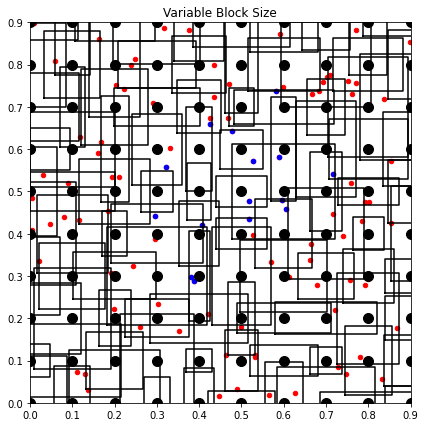

In [11]:
ax = data.plot()
ax = dataSel.plot(color='blue')
ax.decoration(title="Variable Block Size")

for node in range(nech):
    ax = gp.sample(grid.getSampleCoordinates(node))
    ax = gp.curve(grid.getCellEdges(node))

We choose a specific cell again and determine the standard neighrbohood

In [12]:
node = 56
neigh.attach(data, grid)
ranks = neigh.select(node)

dataSel = data.clone()
dum = dataSel.addSelectionByRanks(ranks)

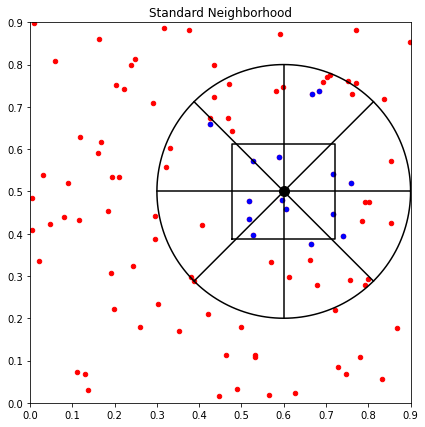

In [13]:
ax = data.plot()
ax = dataSel.plot(color='blue')
ax.neigh(neigh, grid, node, flagCell=True)
ax.decoration(title="Standard Neighborhood")

Modify the neighborhood to set the option for forcing the selection of all samples belonging to the block

In [14]:
neigh.setForceWithinCell(True)
neigh.attach(data, grid)
neigh.display()


Moving Neighborhood
Minimum number of samples           = 1
Maximum number of samples           = 15
Number of angular sectors           = 8
Maximum number of points per sector = 3
Force Selection of all samples within target Block
 

In [15]:
node = 56
ranks = neigh.select(node)

dataSel = data.clone()
dum = dataSel.addSelectionByRanks(ranks)

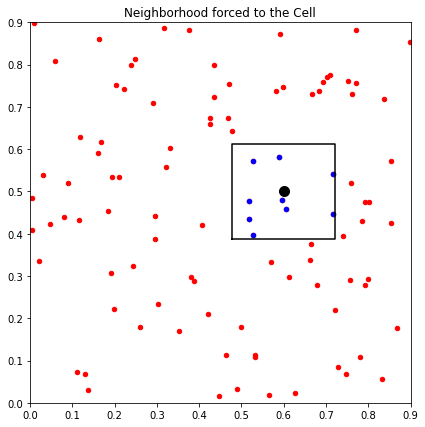

In [16]:
ax = data.plot()
ax = dataSel.plot(color='blue')
ax.neigh(neigh, grid, node, flagCell=True)
ax.decoration(title="Neighborhood forced to the Cell")